In [89]:
import numpy as np
import csv as csv
import json    
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

### Read header

In [90]:
fname = '../riot_rip_acquisition/ak/opensignals_192.168.1.1008888_2020-02-05_11-54-42.txt'
with open(fname) as datafile:
    readdata = csv.reader(datafile, delimiter='\t')
    header = [next(readdata), next(readdata), next(readdata)]
    header_json = json.loads(header[1][0][1:])
print(header_json)

{'192.168.1.100:8888': {'sensor': ['RIOT', 'RIOT', 'RIOT', 'RIOT', 'RIOT'], 'device name': '192.168.1.100:8888', 'column': ['nSeq', 'DI', 'ACCx', 'ACCy', 'ACCz', 'ANALOG1', 'ANALOG2'], 'sync interval': 2, 'time': '11:54:43.221', 'comments': '', 'device connection': '192.168.1.100:8888', 'channels': [1, 2, 3, 13, 14], 'keywords': '', 'convertedValues': 0, 'mode': 0, 'digital IO': [0, 1], 'firmware version': 'riot', 'device': 'riot', 'position': 0, 'sampling rate': 200, 'label': ['ACCx', 'ACCy', 'ACCz', 'ANALOG1', 'ANALOG2'], 'resolution': [1, 1, 1, 1, 1], 'date': '2020-2-5', 'special': [{}, {}, {}, {}, {}]}}


In [91]:
len(header)

3

### Read data

In [92]:
data = np.genfromtxt(fname)
print(data.shape)

(48150, 7)


### Process

In [93]:
col_num  = 5
ripdata = data[:,col_num]

In [94]:
ripdata

array([2321., 2317., 2322., ..., 2238., 2239., 2235.])

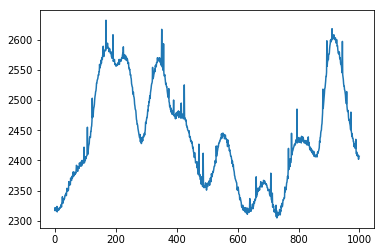

In [97]:
plt.plot(ripdata[:1000])

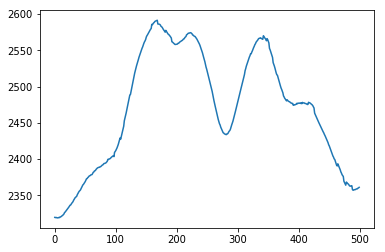

In [105]:
plt.plot(moving_average(ripdata,10)[:1000])

In [109]:
len(ripdata)

48150

In [110]:
len(moving_average(ripdata,10))

48150

In [113]:
rd = ripdata[:1000]
rds = moving_average(rd,10)

In [116]:
rds_diff = np.diff(rds)
rds_diff > 0

array([ True,  True,  True,  True,  True, False,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,